# Building a machine learning pipeline

***Step 1:***
- Conctenate several csv files into one csv file and match the officer ID column

In [1]:
import os
import glob
import pandas as pd
import numpy as np
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir('C:/algorithmic_hiring/input_data')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install matplotlib --force-reinstall --user

In [2]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
all_filenames

['complaints.csv', 'officer_shooting.csv', 'UseOfForce.csv']

In [3]:
# Combining all the csv files
df = pd.concat([pd.read_csv(f) for f in all_filenames])
df

,id,occurredDate,division,district,shift,beat,serviceType,source,allegationType,allegation,...,residentCondition,officerCondition,useOfForceReason,officerForceType,arrestMade,arrestCharges,residentInjured,residentHospitalized,officerInjured,officerHospitalized
0,a25a332352fb0bd97f021e0629e910a0,2015-09-14 00:00:00,Operations Division,Downtown District,DT Middle Shift,NaN,NaN,CPCO (Informal),Citizen Interaction,"Rude, Demeaning, or Affronting Language",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a25a332352fb0bd97f021e0629e910a0,2015-09-14 00:00:00,Operations Division,Downtown District,DT Middle Shift,NaN,NaN,CPCO (Informal),Citizen Interaction,Failure to Make a Report When Approached by a ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,73c1770e3517d1ee3a8cd79553818994,2015-09-15 00:00:00,Operations Division,Southeast District,SE Day Tactical Shift,NaN,Not Applicable,CPCO (Informal),Vehicle Operation,Aggressive or Unsafe Driving,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24f09e6c595b7f083bc73c543d30dad0,2015-09-16 00:00:00,Operations Division,East District,ED Middle Shift,NaN,Self-Initiated Activity,CPCO (Informal),Citizen Interaction,"Rude, Demeaning, or Affronting Language",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,618db71f93906d54ba72c707c43c75d9,2015-09-15 00:00:00,Operations Division,Northwest District,NW Late Shift,NaN,Call for Service,CPCO (Informal),Citizen Interaction,Failure to Make a Report When Approached by a ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16821,81498210c84022bccb32701a28fed068,2019-06-28 00:00:00,Operations Division,East District,ED Late Shift,NaN,Traffic Stop,NaN,NaN,NaN,...,Minor Scrapes,No injuries noted or visible,Non-Compliant,Physical-Handcuffing,True,NaN,True,True,False,False
16822,81498210c84022bccb32701a28fed068,2019-06-28 00:00:00,Operations Division,East District,ED Late Shift,NaN,Traffic Stop,NaN,NaN,NaN,...,Minor Scrapes,No injuries noted or visible,Non-Compliant,Physical-Knee Strike,True,NaN,True,True,False,False
16823,81498210c84022bccb32701a28fed068,2019-06-28 00:00:00,Operations Division,East District,ED Late Shift,NaN,Traffic Stop,NaN,NaN,NaN,...,Minor Scrapes,No injuries noted or visible,Non-Compliant,Physical-Joint/Pressure,True,NaN,True,True,False,False
16824,81498210c84022bccb32701a28fed068,2019-06-28 00:00:00,Operations Division,East District,ED Late Shift,NaN,Traffic Stop,NaN,NaN,NaN,...,Minor Scrapes,No injuries noted or visible,Non-Compliant,Physical-Weight Leverage,True,NaN,True,True,False,False


***Feature selection***

In [4]:
temp_df = df.drop(['id','division','district','shift','beat','serviceType'
         ,'source','allegation','residentCondition','officerCondition'
         ,'arrestMade','arrestCharges','residentInjured','residentHospitalized'
         ,'officerInjured','officerHospitalized','residentRace','finding','residentSex'
         ,'residentAge','officerAge','officerYearsOfService'
         ,'disposition','occurredDate'],axis=1)
temp_df

,allegationType,officerRace,officerSex,officerIdentifier,residentWeaponUsed,officerWeaponUsed,useOfForceReason,officerForceType
0,Citizen Interaction,Black,Female,D2551d43b19ebffa7bd2ee6527246459,NaN,NaN,NaN,NaN
1,Citizen Interaction,White,Male,9ccd97e1f4a3ff326f52ea6118ad10cf,NaN,NaN,NaN,NaN
2,Vehicle Operation,White,Female,86b3db6862d5c9c52be8c3a18dbdd35b,NaN,NaN,NaN,NaN
3,Citizen Interaction,White,Male,26e7ffb946a061efe6f9ce0376b5fec4,NaN,NaN,NaN,NaN
4,Citizen Interaction,Black,Male,Dd58d505aaff5d539d5936329f0fbbae,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
16821,NaN,Other,Male,4f5b0245132a579c404103a1e921faad,NaN,NaN,Non-Compliant,Physical-Handcuffing
16822,NaN,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,NaN,Non-Compliant,Physical-Knee Strike
16823,NaN,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,NaN,Non-Compliant,Physical-Joint/Pressure
16824,NaN,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,NaN,Non-Compliant,Physical-Weight Leverage


***Converting values to 0 or 1
   - Encoding these categorical values
   - Unable to use HotEncoders due to special conditions for police brutality
   - Only use OneHotEncoder for gender and race***

In [5]:
temp_df['allegationType'].unique()

array(['Citizen Interaction', 'Vehicle Operation',
       'Substandard Performance', 'Breach of Discipline',
       'Bias-Based Profiling', 'Use of Force', 'Equipment and Uniforms',
       'Neglect of Duty', nan, 'Detention/Arrest', 'Search/Seizure',
       'Animal Incidents', 'Off-Duty Employment', 'Field Operations',
       'Civilian Employees', 'Prisoner Handling/Trans.',
       'Conduct Unbecoming', 'Violation of Any Rule',
       'Investigative Procedures', 'Violation of Any Law',
       'Supv. Responsibilities', 'Info. Security/Access',
       'Failure to Cooperate', 'Unit or Section SOPs'], dtype=object)

In [6]:
temp_df['allegationType'] = temp_df.allegationType.map({'Citizen Interaction':1, 'Vehicle Operation':1, 'Citizen Interaction':1, 'Vehicle Operation':1,
                                              'Substandard Performance':1, 'Breach of Discipline':1,
                                              'Bias-Based Profiling':1, 'Use of Force':1, 'Equipment and Uniforms':1,
                                              'Neglect of Duty':1, 'Detention/Arrest':1, 'Search/Seizure':1,
                                              'Animal Incidents':1, 'Off-Duty Employment':1, 'Field Operations':1,
                                              'Civilian Employees':1, 'Prisoner Handling/Trans.':1,
                                              'Conduct Unbecoming':1, 'Violation of Any Rule':1,
                                              'Investigative Procedures':1, 'Violation of Any Law':1,
                                              'Supv. Responsibilities':1, 'Info. Security/Access':1,
                                              'Failure to Cooperate':1, 'Unit or Section SOPs':1})
temp_df['allegationType']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
16821    NaN
16822    NaN
16823    NaN
16824    NaN
16825    NaN
Name: allegationType, Length: 18845, dtype: float64

In [7]:
temp_df['allegationType'] = temp_df['allegationType'].fillna(0)
temp_df

,allegationType,officerRace,officerSex,officerIdentifier,residentWeaponUsed,officerWeaponUsed,useOfForceReason,officerForceType
0,1.0,Black,Female,D2551d43b19ebffa7bd2ee6527246459,NaN,NaN,NaN,NaN
1,1.0,White,Male,9ccd97e1f4a3ff326f52ea6118ad10cf,NaN,NaN,NaN,NaN
2,1.0,White,Female,86b3db6862d5c9c52be8c3a18dbdd35b,NaN,NaN,NaN,NaN
3,1.0,White,Male,26e7ffb946a061efe6f9ce0376b5fec4,NaN,NaN,NaN,NaN
4,1.0,Black,Male,Dd58d505aaff5d539d5936329f0fbbae,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
16821,0.0,Other,Male,4f5b0245132a579c404103a1e921faad,NaN,NaN,Non-Compliant,Physical-Handcuffing
16822,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,NaN,Non-Compliant,Physical-Knee Strike
16823,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,NaN,Non-Compliant,Physical-Joint/Pressure
16824,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,NaN,Non-Compliant,Physical-Weight Leverage


In [8]:
temp_df['useOfForceReason'].unique()

array([nan, 'Fleeing', 'Combative Suspect', 'Resisting Arrest',
       'Non-Compliant', 'Assaulting Citizen(s)', 'Assaulting Officer(s)',
       'Canine Incident'], dtype=object)

In [9]:
temp_df['officerForceType'].value_counts()

Physical-Handcuffing                3068
Physical-Weight Leverage            2907
Physical-Take Down                  2181
Less Lethal-Taser                   1464
Physical-Joint/Pressure             1004
Physical-Other                       939
Physical-Leg Sweep                   714
Physical-Knee Strike                 651
Physical-Fist Strike                 483
Less Lethal-CS/OC                    438
Canine Bite                          406
Physical-Palm Strike                 250
Physical-Hands, Fist, Feet           201
Physical-Kick                        187
Physical-Elbow Strike                118
Less Lethal-Bean Bag                  92
Less Lethal-Pepperball                88
Less Lethal-Baton                     57
Less Lethal-CS Fogger                 52
Less Lethal-Other                     46
Less Lethal-Burning CS                41
Less Lethal-Personal CS/OC spray      35
Lethal-Handgun                        22
Less Lethal-Clearout OC               12
Less Lethal-Bps 

For reasons such as fleeing, combative suspect, resisting arrest, officers are not allowed to use lethal weapons and riot gears such as CS grenades, Fogger, Baton, etc.

In [10]:
conditions = [
    # Fleeing 19
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerForceType'].eq('Less Lethal-Pepperball'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerForceType'].eq('Less Lethal-Personal CS/OC spray'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerForceType'].eq('Less Lethal-Baton'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerForceType'].eq('Less Lethal-Bean Bag'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerForceType'].eq('Less Lethal-BPS Gas'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerForceType'].eq('Less Lethal-Burning CS'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerForceType'].eq('Less Lethal-Clearout OC'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerForceType'].eq('Less Lethal-CS Fogger'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerForceType'].eq('Less Lethal-CS Grenade'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerForceType'].eq('Less Lethal-CS/OC'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerForceType'].eq('Less Lethal-Flash Bang'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerForceType'].eq('Less Lethal-Pepperball'), 
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerForceType'].eq('Less Lethal-Taser'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerWeaponUsed'].eq('IMPD - Duty Handgun'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerWeaponUsed'].eq('Duty Handgun'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerWeaponUsed'].eq('Personal Patrol Rifle'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerWeaponUsed'].eq('IMPD - Patrol Rifle'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerWeaponUsed'].eq('Personal Shotgun'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerWeaponUsed'].eq('IMPD - Shotgun'),
    # Combative suspect 15
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerWeaponUsed'].eq('IMPD - Shotgun'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerWeaponUsed'].eq('Personal Shotgun'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerWeaponUsed'].eq('IMPD - Patrol Rifle'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerWeaponUsed'].eq('Personal Patrol Rifle'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerWeaponUsed'].eq('Duty Handgun'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerWeaponUsed'].eq('IMPD - Duty Handgun'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerForceType'].eq('Flash Bang'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerForceType'].eq('IMPD - Shotgun'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerForceType'].eq('Less Lethal-CS/OC'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerForceType'].eq('IMPD - Shotgun'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerForceType'].eq('Less Lethal-Flash Bang'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerForceType'].eq('Less Lethal-CS Grenade'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerForceType'].eq('Less Lethal-CS Fogger'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerForceType'].eq('Less Lethal-Clearout OC'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerForceType'].eq('Less Lethal-Burning CS'),
    # Resisting Arrest 15
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('IMPD - Shotgun'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Personal Shotgun'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('IMPD - Patrol Rifle'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Personal Patrol Rifle'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Duty Handgun'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('IMPD - Duty Handgun'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Flash Bang'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('IMPD - Shotgun'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Less Lethal-CS/OC'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('IMPD - Shotgun'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Less Lethal-Flash Bang'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Less Lethal-CS Grenade'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Less Lethal-CS Fogger'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Less Lethal-Clearout OC'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Less Lethal-Burning CS'),
    # Non Compliant 15
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('IMPD - Shotgun'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Personal Shotgun'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('IMPD - Patrol Rifle'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Personal Patrol Rifle'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Duty Handgun'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('IMPD - Duty Handgun'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Flash Bang'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('IMPD - Shotgun'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Less Lethal-CS/OC'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('IMPD - Shotgun'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Less Lethal-Flash Bang'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Less Lethal-CS Grenade'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Less Lethal-CS Fogger'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Less Lethal-Clearout OC'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Less Lethal-Burning CS'),
]
choices = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
temp_df['police_brutality'] = np.select(conditions, choices)
temp_df

,allegationType,officerRace,officerSex,officerIdentifier,residentWeaponUsed,officerWeaponUsed,useOfForceReason,officerForceType,police_brutality
0,1.0,Black,Female,D2551d43b19ebffa7bd2ee6527246459,NaN,NaN,NaN,NaN,0
1,1.0,White,Male,9ccd97e1f4a3ff326f52ea6118ad10cf,NaN,NaN,NaN,NaN,0
2,1.0,White,Female,86b3db6862d5c9c52be8c3a18dbdd35b,NaN,NaN,NaN,NaN,0
3,1.0,White,Male,26e7ffb946a061efe6f9ce0376b5fec4,NaN,NaN,NaN,NaN,0
4,1.0,Black,Male,Dd58d505aaff5d539d5936329f0fbbae,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
16821,0.0,Other,Male,4f5b0245132a579c404103a1e921faad,NaN,NaN,Non-Compliant,Physical-Handcuffing,0
16822,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,NaN,Non-Compliant,Physical-Knee Strike,0
16823,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,NaN,Non-Compliant,Physical-Joint/Pressure,0
16824,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,NaN,Non-Compliant,Physical-Weight Leverage,0


In [11]:
temp_df['allegationType'].value_counts()

0.0    17084
1.0     1761
Name: allegationType, dtype: int64

In [12]:
temp_df['police_brutality'].value_counts()

0    18295
1      550
Name: police_brutality, dtype: int64

In [13]:
temp_df = temp_df.drop(['useOfForceReason', 'officerForceType', 'officerWeaponUsed'], axis=1)
temp_df

,allegationType,officerRace,officerSex,officerIdentifier,residentWeaponUsed,police_brutality
0,1.0,Black,Female,D2551d43b19ebffa7bd2ee6527246459,NaN,0
1,1.0,White,Male,9ccd97e1f4a3ff326f52ea6118ad10cf,NaN,0
2,1.0,White,Female,86b3db6862d5c9c52be8c3a18dbdd35b,NaN,0
3,1.0,White,Male,26e7ffb946a061efe6f9ce0376b5fec4,NaN,0
4,1.0,Black,Male,Dd58d505aaff5d539d5936329f0fbbae,NaN,0
...,...,...,...,...,...,...
16821,0.0,Other,Male,4f5b0245132a579c404103a1e921faad,NaN,0
16822,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,0
16823,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,0
16824,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,0


In [14]:
temp_df = temp_df.rename(columns={'allegationType': 'receivedComplaint(s)', 'residentWeaponUsed':'involvedInShooting'})

In [15]:
temp_df['involvedInShooting']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
16821    NaN
16822    NaN
16823    NaN
16824    NaN
16825    NaN
Name: involvedInShooting, Length: 18845, dtype: object

In [16]:
temp_df['involvedInShooting'] = temp_df.involvedInShooting.map({'Handgun':1, 'Misc Weapon':1, 'Unarmed':0, 'Knife':1,
                                                                'Rifle':1})
temp_df

,receivedComplaint(s),officerRace,officerSex,officerIdentifier,involvedInShooting,police_brutality
0,1.0,Black,Female,D2551d43b19ebffa7bd2ee6527246459,NaN,0
1,1.0,White,Male,9ccd97e1f4a3ff326f52ea6118ad10cf,NaN,0
2,1.0,White,Female,86b3db6862d5c9c52be8c3a18dbdd35b,NaN,0
3,1.0,White,Male,26e7ffb946a061efe6f9ce0376b5fec4,NaN,0
4,1.0,Black,Male,Dd58d505aaff5d539d5936329f0fbbae,NaN,0
...,...,...,...,...,...,...
16821,0.0,Other,Male,4f5b0245132a579c404103a1e921faad,NaN,0
16822,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,0
16823,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,0
16824,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,0


In [17]:
temp_df['involvedInShooting'] = temp_df['involvedInShooting'].replace(np.nan, 0)
temp_df

,receivedComplaint(s),officerRace,officerSex,officerIdentifier,involvedInShooting,police_brutality
0,1.0,Black,Female,D2551d43b19ebffa7bd2ee6527246459,0.0,0
1,1.0,White,Male,9ccd97e1f4a3ff326f52ea6118ad10cf,0.0,0
2,1.0,White,Female,86b3db6862d5c9c52be8c3a18dbdd35b,0.0,0
3,1.0,White,Male,26e7ffb946a061efe6f9ce0376b5fec4,0.0,0
4,1.0,Black,Male,Dd58d505aaff5d539d5936329f0fbbae,0.0,0
...,...,...,...,...,...,...
16821,0.0,Other,Male,4f5b0245132a579c404103a1e921faad,0.0,0
16822,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,0.0,0
16823,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,0.0,0
16824,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,0.0,0


In [18]:
temp_df.to_csv('output.csv', index=False)

In [18]:
temp_df['involvedInShooting'].value_counts()

0.0    18811
1.0       34
Name: involvedInShooting, dtype: int64

In [19]:
temp_df['receivedComplaint(s)'].value_counts()

0.0    17084
1.0     1761
Name: receivedComplaint(s), dtype: int64

***Hot encoding race and gender. Converting them to integer values***

In [20]:
temp_df = pd.get_dummies(temp_df, columns=['officerRace', 'officerSex'])

In [21]:
temp_df

,receivedComplaint(s),officerIdentifier,involvedInShooting,police_brutality,officerRace_Asian,officerRace_Black,officerRace_Hispanic,officerRace_Other,officerRace_White,officerSex_Female,officerSex_Male
0,1.0,D2551d43b19ebffa7bd2ee6527246459,0.0,0,0,1,0,0,0,1,0
1,1.0,9ccd97e1f4a3ff326f52ea6118ad10cf,0.0,0,0,0,0,0,1,0,1
2,1.0,86b3db6862d5c9c52be8c3a18dbdd35b,0.0,0,0,0,0,0,1,1,0
3,1.0,26e7ffb946a061efe6f9ce0376b5fec4,0.0,0,0,0,0,0,1,0,1
4,1.0,Dd58d505aaff5d539d5936329f0fbbae,0.0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
16821,0.0,4f5b0245132a579c404103a1e921faad,0.0,0,0,0,0,1,0,0,1
16822,0.0,df3f266d261dd9ae81516797fae2fdeb,0.0,0,0,0,0,0,1,1,0
16823,0.0,df3f266d261dd9ae81516797fae2fdeb,0.0,0,0,0,0,0,1,1,0
16824,0.0,df3f266d261dd9ae81516797fae2fdeb,0.0,0,0,0,0,0,1,1,0


In [22]:
temp_df['officerRace_White'].value_counts()

1    15107
0     3738
Name: officerRace_White, dtype: int64

In [23]:
temp_df['officerRace_Asian'].value_counts()

0    18817
1       28
Name: officerRace_Asian, dtype: int64

In [24]:
temp_df['officerRace_Black'].value_counts()

0    16728
1     2117
Name: officerRace_Black, dtype: int64

In [25]:
temp_df['officerRace_Other'].value_counts()

0    18620
1      225
Name: officerRace_Other, dtype: int64

***Further data analysis and exploration***
- Descriptive statistics

In [26]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

In [26]:
temp_df.describe()

,receivedComplaint(s),involvedInShooting,police_brutality,officerRace_Asian,officerRace_Black,officerRace_Hispanic,officerRace_Other,officerRace_White,officerSex_Female,officerSex_Male
count,18845.000000,18845.000000,18845.000000,18845.000000,18845.000000,18845.000000,18845.000000,18845.000000,18845.000000,18845.000000
mean,0.093447,0.001804,0.029185,0.001486,0.112337,0.037623,0.011940,0.801645,0.085009,0.882356
std,0.291065,0.042439,0.168331,0.038519,0.315790,0.190287,0.108617,0.398772,0.278903,0.322195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


***The Metric Trap***
- Rookies usually use simpler metrics like accuracy score which may be misleading and meaningless
- In datasets with highly imbalanced classes as shown below, the classifier will always predict the most common classes without performing any analysis of the features.
- It will obviously have >90% accuracy, cuz it predicts the most common class.

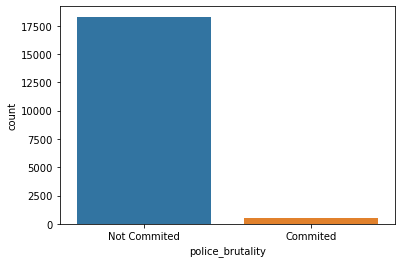

In [27]:
g = sns.countplot(temp_df['police_brutality'])
g.set_xticklabels(['Not Commited','Commited'])
plt.show()

In [40]:
# Experiment: Using a simple XGBClassifier without feature engineering
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

y = temp_df['police_brutality']
x = temp_df.drop(['police_brutality','officerIdentifier'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

xgb_model = XGBClassifier().fit(x_train, y_train)

# Predict
xgb_y_predict = xgb_model.predict(x_test)

# Accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)

print('Accuracy score is: ', xgb_score)

[21:26:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score is:  0.9663040594322101


In [29]:
# Create 2-dim plot function to visualize data distribution
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

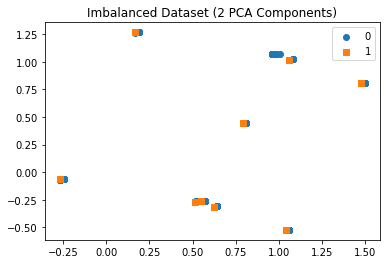

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

plot_2d_space(principalComponents,y, 'Imbalanced Dataset (2 PCA Components)')

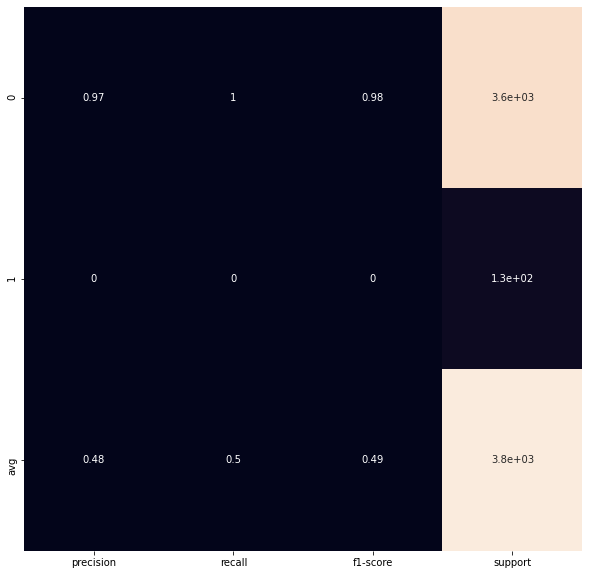

In [31]:
from sklearn.metrics import precision_recall_fscore_support

def plot_classification_report(y_tru, y_prd, figsize=(10, 10), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(y_tru))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax)

plot_classification_report(y_test, xgb_y_predict)

***Non-existent precision, recall and f1-score***
- Low Precision: Low accuracy of predictions for police brutality
- Low recall: Small fraction of high risk police officers correctly identified
- Low F1 score: Low percentage of positive predictions were correct

***Resampling Technique***
- Oversampling to duplicate random records from the minority class, causes overfitting
- Undersampling to remove random records from the majority class, causes loss of info

***We will be using oversampling and exploring algorithms like ADASYN and SMOTE***

***Since this is quite a large dataset, it would be best to do some under-sampling as well to prevent poor generalization of our test dataset***

***Tomek links***
- Tomek links are pairs of very close instances of the majority and minority class
- We will remove those pairs

In [39]:
# Combining Tomek links and SMOTE using SMOTETomek class
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))

x_sm, y_sm = resample.fit_resample(x,y)

print(f'''Shape of X before SMOTE: {x.shape}
Shape of X after SMOTE: {x_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (18845, 9)
Shape of X after SMOTE: (36590, 9)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: police_brutality, dtype: float64

In [33]:
from collections import Counter

print('Resampled dataset shape %s' % Counter(y_sm))

Resampled dataset shape Counter({0: 18295, 1: 18295})


***Synthetic Minority Oversampling Technique***
- Create synthetic samples from the minor class by selecting 2 or more similar instances by a distance measure and 
  duplicating it one attribute at a time by a random amount

In [37]:
x_sm_train, x_sm_test, y_sm_train, y_sm_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=0)

***Cost-Sensitive Learning for Imbalanced Classification***
- Right here we will be using a cost sensitive algorithm that takes the costs of prediction errors into account when training a ML model.
- A penalty is associated with incorrect prediction and is referred to as "cost"
- The goal of Cost-Sensitive Learning is to minimize the cost of a model on a training dataset

***The algorithm we are going to use is called penalized-SVM***
- Use the argument of class_weight='balanced'
- Use the argument probability=True

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

# Add class_weight='balanced' to add penalize mistakes
# Probability=True to enable probability estimates
svc_model = SVC(probability=False, gamma='auto')

svc_model.fit(x_sm_train, y_sm_train)

svc_predict = svc_model.predict(x_sm_test)
print('ROCAUC score: ', roc_auc_score(y_sm_test, svc_predict))
print('Accuracy score: ', accuracy_score(y_sm_test, svc_predict))

ROCAUC score:  0.5930467639376649
Accuracy score:  0.5952446023503689


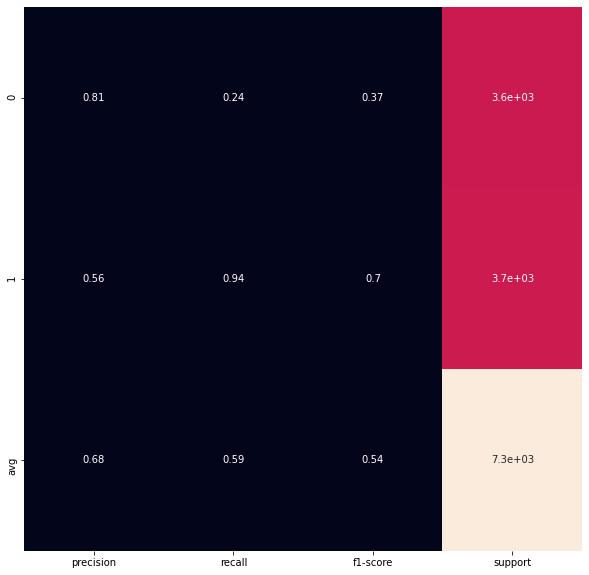

In [42]:
plot_classification_report(y_sm_test, svc_predict)

***As you can see, the metrics aren't that promising yet. Look at the precision and accuracy.
   This leads us to the 2nd step, which is changing the algorithm***

In [43]:
# Using decision trees, RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(x_sm_train, y_sm_train)

rfc_predict = rfc.predict(x_sm_test)
print('ROCAUC score:',roc_auc_score(y_sm_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_sm_test, rfc_predict))

ROCAUC score: 0.5949479046220755
Accuracy score: 0.5971576933588412


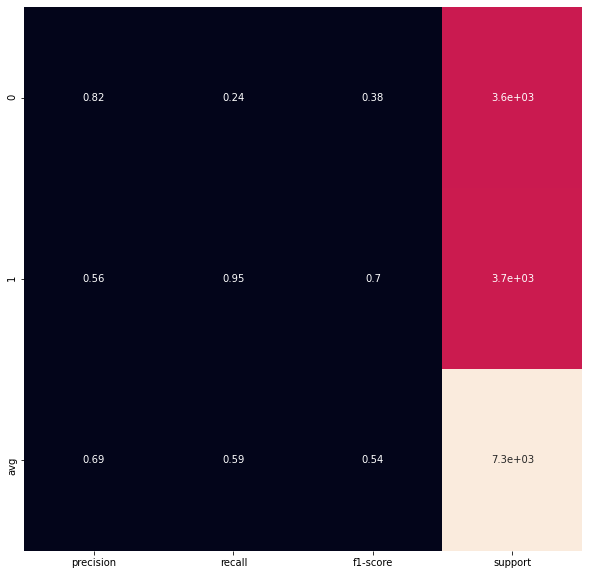

In [44]:
plot_classification_report(y_sm_test, rfc_predict)

***Not a big fan of this either, let's get our hands dirty
   KNN model***

ROCAUC score: 0.5111252434314588
Accuracy score: 0.5086089095381252


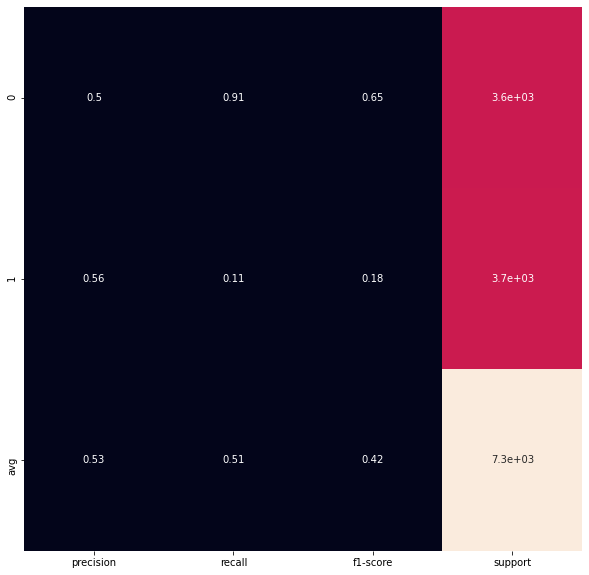

In [45]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_sm_train, y_sm_train)
knn_predict = knn.predict(x_sm_test)

print('ROCAUC score:',roc_auc_score(y_sm_test, knn_predict))
print('Accuracy score:',accuracy_score(y_sm_test, knn_predict))
plot_classification_report(y_sm_test, knn_predict)

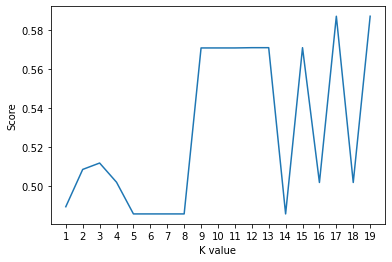

Maximum KNN Score is 58.72%


In [46]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_sm_train, y_sm_train)
    scoreList.append(knn2.score(x_sm_test, y_sm_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
print("Maximum KNN Score is {:.2f}%".format(acc))

***Naive Bayes Algorithm***

ROCAUC score: 0.5111252434314588
Accuracy score: 0.5086089095381252


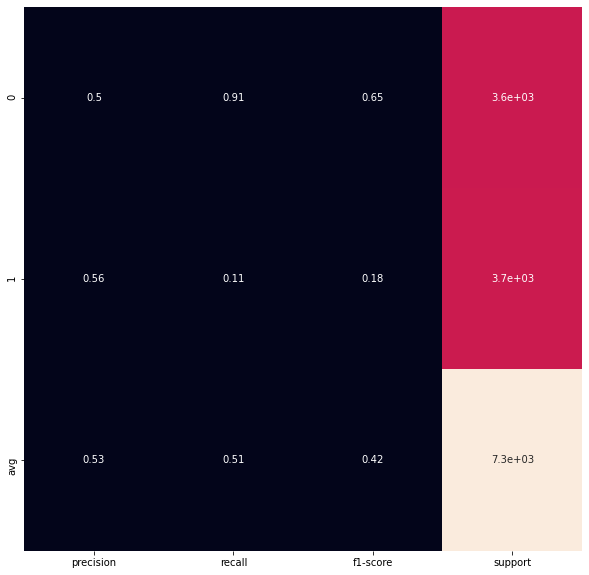

In [47]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_sm_train, y_sm_train)
nb_predict = knn.predict(x_sm_test)

print('ROCAUC score:',roc_auc_score(y_sm_test, nb_predict))
print('Accuracy score:',accuracy_score(y_sm_test, nb_predict))
plot_classification_report(y_sm_test, nb_predict)

***Using Class Weights***
- Could be a better alternative since it don't involve duplicating or removing records for balancing.

In [48]:
n = Counter(y_train)
ratio = int(n[0]/n[1])
print(ratio,n)

34 Counter({0: 14653, 1: 423})


In [49]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

# Add class_weight='balanced' to add penalize mistakes
# Probability=True to enable probability estimates
svc_model = SVC(class_weight={0:1, 1:ratio}, probability=False, gamma='auto')

svc_model.fit(x_train, y_train)

svc_predict = svc_model.predict(x_test)
print('ROCAUC score: ', roc_auc_score(y_test, svc_predict))
print('Accuracy score: ', accuracy_score(y_test, svc_predict))

ROCAUC score:  0.5983776327794281
Accuracy score:  0.28256832050941894


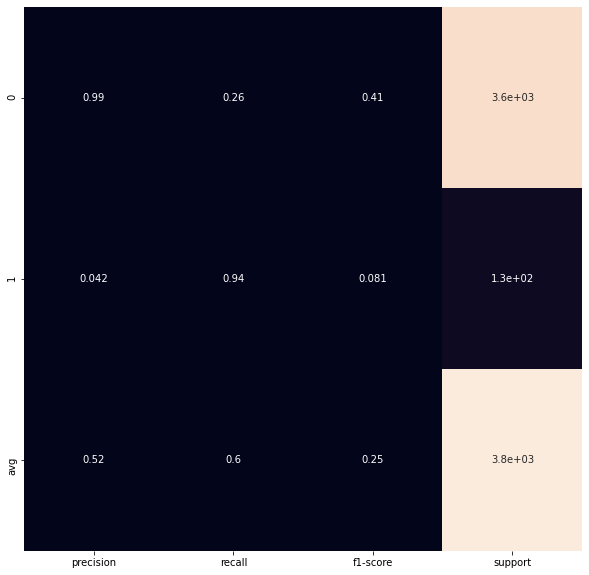

In [50]:
plot_classification_report(y_test, svc_predict)

In [53]:
from sklearn.model_selection import KFold, RepeatedKFold

kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
for train_index, test_index in kf.split(x):
    print("Train: ", train_index, "Validation: ", test_index)
    x_train, x_test = x.iloc[list(train_index)], x.iloc[list(test_index)]
    y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]

Train:  [    0     1     3 ... 18842 18843 18844] Validation:  [    2     8    11 ... 18827 18839 18840]
Train:  [    0     1     2 ... 18842 18843 18844] Validation:  [    7    18    24 ... 18833 18838 18841]
Train:  [    0     1     2 ... 18842 18843 18844] Validation:  [    3     5    13 ... 18811 18816 18830]
Train:  [    2     3     4 ... 18842 18843 18844] Validation:  [    0     1     9 ... 18835 18836 18837]
Train:  [    0     1     2 ... 18839 18840 18841] Validation:  [    4     6    10 ... 18842 18843 18844]
Train:  [    0     1     2 ... 18842 18843 18844] Validation:  [    4     6     8 ... 18833 18836 18839]
Train:  [    0     1     2 ... 18842 18843 18844] Validation:  [    3     9    11 ... 18822 18826 18828]
Train:  [    1     2     3 ... 18839 18841 18844] Validation:  [    0    13    14 ... 18840 18842 18843]
Train:  [    0     1     3 ... 18840 18842 18843] Validation:  [    2    17    19 ... 18838 18841 18844]
Train:  [    0     2     3 ... 18842 18843 18844] Valid

In [54]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)

for train_index, test_index in skf.split(x,y):
    print("Train: ", train_index, "Validation: ", test_index)
    x_train, x_test = x.iloc[list(train_index)], x.iloc[list(test_index)]
    y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]

Train:  [ 3743  3744  3745 ... 18842 18843 18844] Validation:  [   0    1    2 ... 4212 4218 4242]
Train:  [    0     1     2 ... 18842 18843 18844] Validation:  [3743 3744 3745 ... 7580 7581 7582]
Train:  [    0     1     2 ... 18842 18843 18844] Validation:  [ 6498  6622  6633 ... 11356 11357 11358]
Train:  [    0     1     2 ... 18842 18843 18844] Validation:  [ 9652  9706  9735 ... 15103 15104 15105]
Train:  [    0     1     2 ... 15103 15104 15105] Validation:  [13766 13833 13839 ... 18842 18843 18844]


Accuracy: nan%


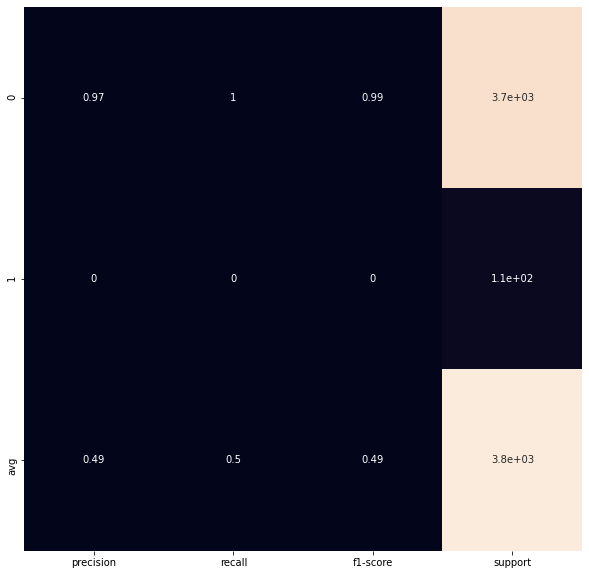

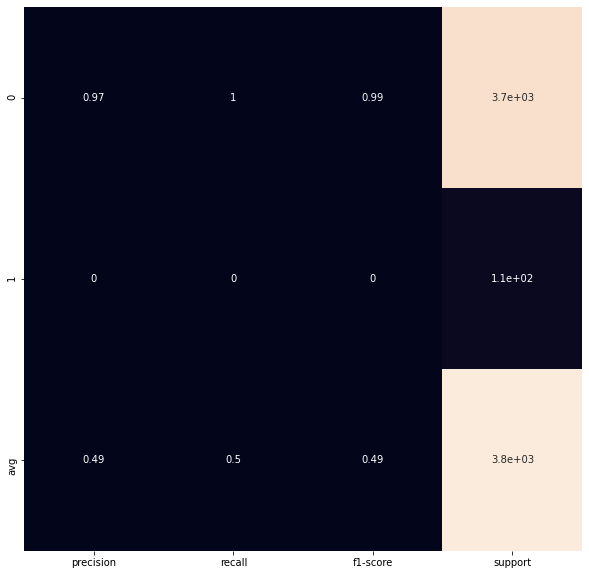

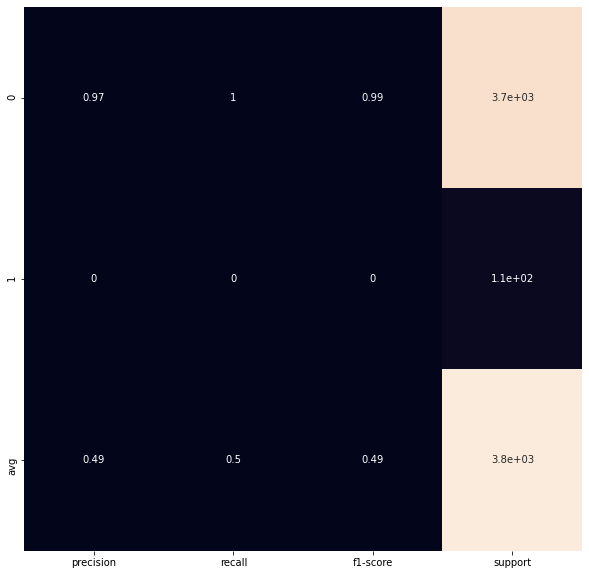

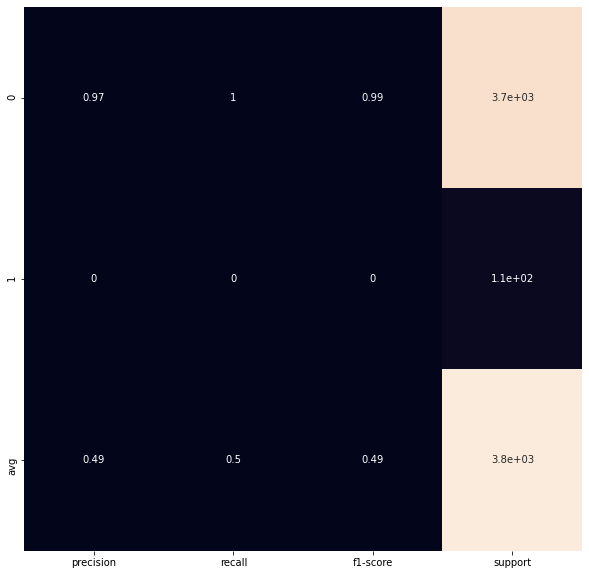

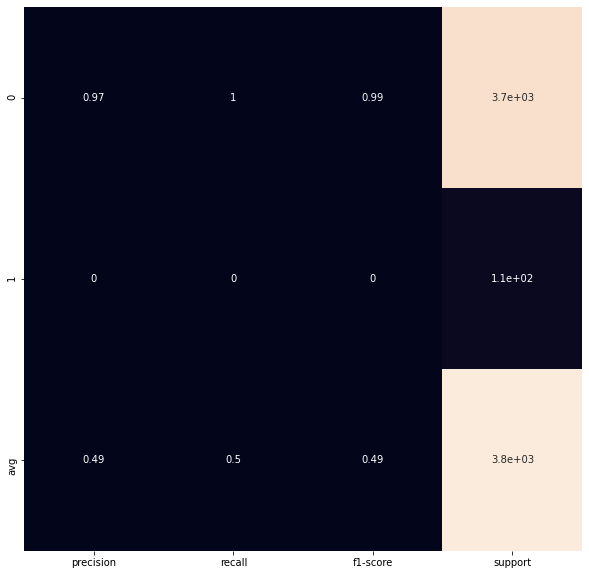

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

svc_model = SVC(probability=False, gamma='auto')
results_skfold = cross_val_score(svc_model, x, y, cv=skf, scoring=make_scorer(plot_classification_report))
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

In [41]:
from sklearn.utils import resample

X = pd.concat([x_train, y_train], axis=1)

not_brutal = X[X.police_brutality==0]
brutal = X[X.police_brutality==1]

brutal_upsampled = resample(brutal,
                            replace=True,
                            n_samples=len(not_brutal),
                            random_state=0)
upsampled = pd.concat([not_brutal, brutal_upsampled])
upsampled.police_brutality.value_counts()

0    14653
1    14653
Name: police_brutality, dtype: int64

In [42]:
upsampled.police_brutality

1652     0
13123    0
3117     0
251      0
15120    0
        ..
4275     1
15549    1
2247     1
7096     1
10206    1
Name: police_brutality, Length: 29306, dtype: int32

In [45]:
from sklearn.ensemble import RandomForestClassifier

y_train = upsampled.police_brutality
x_train = upsampled.drop('police_brutality', axis=1)

rfc = RandomForestClassifier(n_estimators=10).fit(x_train, y_train)

upsampled_pred = rfc.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score

precision_score(y_test, upsampled_pred)

0.04227353463587922

In [52]:
not_brutal_downsampled = resample(not_brutal,
                                  replace=False,
                                  n_samples=len(brutal),
                                  random_state=0)
downsampled=pd.concat([not_brutal_downsampled, brutal])
downsampled.police_brutality.value_counts()

0    423
1    423
Name: police_brutality, dtype: int64

In [59]:
from sklearn.svm import SVC

y_train = downsampled.police_brutality
x_train = downsampled.drop('police_brutality', axis=1)

svc_model = SVC(probability=False, gamma='auto')

svc_model.fit(x_train, y_train)

downsampled_pred = rfc.predict(x_test)

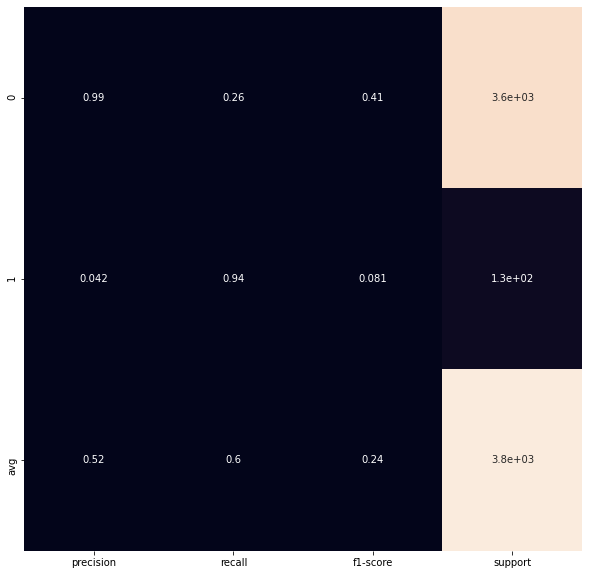

In [61]:
plot_classification_report(y_test, downsampled_pred)